<a href="https://colab.research.google.com/github/PiyushGithub24/MACHINE_LEARNING_BY_PIYUSH_KUMAR/blob/main/Mean_Median_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [131]:
df=pd.read_csv('titanic_toy.csv')

In [132]:
df.sample(5)

,Age,Fare,Family,Survived
529,23.0,11.5000,3,0
885,39.0,29.1250,5,0
331,45.5,28.5000,0,0
679,36.0,512.3292,1,1
698,49.0,NaN,2,0


In [133]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [134]:
df.shape

(891, 4)

In [135]:
#lets see the %age of missing value :
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [136]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=2)

In [137]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [138]:
X_train.sample(5)

,Age,Fare,Family
413,NaN,0.0000,0
270,NaN,31.0000,0
100,28.0,7.8958,0
368,NaN,7.7500,0
791,16.0,26.0000,0


In [139]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [140]:
Mean_Age=X_train['Age'].mean()
Median_Age=X_train['Age'].median()

Mean_Fare=X_train['Fare'].mean()
Median_Fare=X_train['Fare'].median()


In [141]:
X_train["Mean_Age"]=X_train['Age'].fillna(Mean_Age)
X_train["Median_Age"]=X_train['Age'].fillna(Median_Age)

X_train["Mean_Fare"]=X_train['Fare'].fillna(Mean_Fare)
X_train["Median_Fare"]=X_train['Fare'].fillna(Median_Fare)

In [142]:
print("Mean_Age :",Mean_Age,"   Median_Age :",Median_Age)
print("Mean_Fare :",Mean_Fare,"   Median_Fare :",Median_Fare)

Mean_Age : 29.78590425531915    Median_Age : 28.75
Mean_Fare : 32.61759689349112    Median_Fare : 14.4583


In [143]:
X_train.sample(5)

,Age,Fare,Family,Mean_Age,Median_Age,Mean_Fare,Median_Fare
679,36.0,512.3292,1,36.000000,36.00,512.3292,512.3292
691,4.0,13.4167,1,4.000000,4.00,13.4167,13.4167
401,26.0,8.0500,0,26.000000,26.00,8.0500,8.0500
433,17.0,7.1250,0,17.000000,17.00,7.1250,7.1250
351,NaN,35.0000,0,29.785904,28.75,35.0000,35.0000


##See the vaiances of original and imputed variables :-

In [144]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Median_Age'].var())
print('Age Variance after mean imputation: ', X_train['Mean_Age'].var())

print('\nOriginal Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Median_Fare'].var())
print('Fare Variance after mean imputation: ', X_train['Mean_Fare'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676

Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


##Plotting the kde plot of original and imputed age variable :-

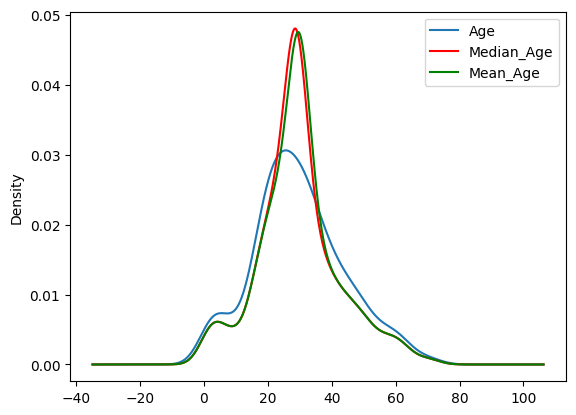

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Median_Age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Mean_Age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##Plotting the kde plot of original and imputed Fare variable :-

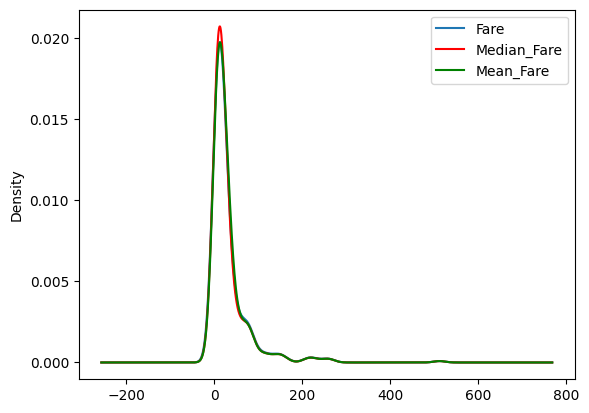

In [146]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Median_Fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Mean_Fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [147]:
X_train.cov()

,Age,Fare,Family,Mean_Age,Median_Age,Mean_Fare,Median_Fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Mean_Age,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Median_Age,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Mean_Fare,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Median_Fare,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [148]:
X_train.corr()

,Age,Fare,Family,Mean_Age,Median_Age,Mean_Fare,Median_Fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Mean_Age,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Median_Age,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Mean_Fare,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Median_Fare,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


##Box plot of original and imputed age variables :-

<Axes: >

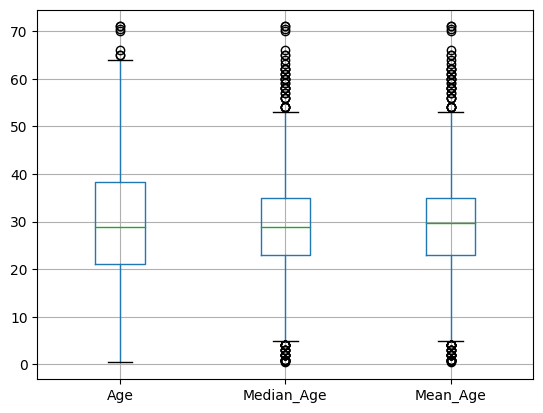

In [149]:
X_train[['Age', 'Median_Age', 'Mean_Age']].boxplot()

##Box plot of original and imputed Fare variables :-

<Axes: >

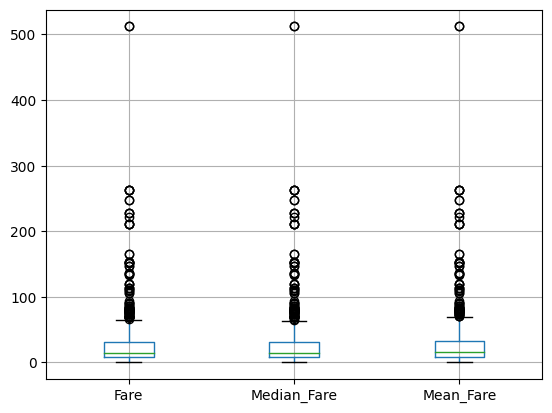

In [150]:
X_train[['Fare', 'Median_Fare', 'Mean_Fare']].boxplot()

#Using scikit-learn :-

In [151]:
X_train ,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=2)

In [152]:
Imputer1=SimpleImputer(strategy='median')
Imputer2=SimpleImputer(strategy='mean')

In [153]:
trf=ColumnTransformer([
    ('impute_age',Imputer1,['Age']),
    ('impute_fare',Imputer2,['Fare'])
],remainder='passthrough')

In [154]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_age', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('impute_fare', SimpleImputer(), ['Fare'])])

In [155]:
trf.named_transformers_['impute_age'].statistics_

array([28.75])

In [156]:
trf.named_transformers_['impute_fare'].statistics_

array([32.61759689])

In [157]:
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [158]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [159]:
X_train=pd.DataFrame(X_train,columns=df.drop('Survived',axis=1).columns)
X_test=pd.DataFrame(X_test,columns=df.drop('Survived',axis=1).columns)

In [160]:
X_train.sample(5)

,Age,Fare,Family
620,18.00,73.500,0.0
370,25.00,7.225,0.0
374,28.75,15.500,0.0
670,28.75,8.050,0.0
146,65.00,26.550,0.0


In [161]:
X_train.iloc[331]

Age       14.0000
Fare       7.8542
Family     0.0000
Name: 331, dtype: float64